# Načtení dat

In [8]:
import pandas as pd

# načtení datasetu
df = pd.read_excel("data/dataset_ml.xlsx")

print(df.head(10))

               kraj      datum   cena
0             praha 2019-03-31  73818
1             praha 2019-06-30  75162
2             praha 2019-09-30  77202
3             praha 2019-12-31  79382
4  stredocesky_kraj 2019-03-31  28777
5  stredocesky_kraj 2019-06-30  31328
6  stredocesky_kraj 2019-09-30  31846
7  stredocesky_kraj 2019-12-31  32882
8    jihocesky_kraj 2019-03-31  26028
9    jihocesky_kraj 2019-06-30  26896


# Trénování dat

In [9]:
from mlforecast import MLForecast
from sklearn.linear_model import LinearRegression

models = [LinearRegression()]

# vytvoření modelu
fcst = MLForecast(
    models = models,
    freq = 'QE',
    lags = [1, 4]
)

# trénování modelu
cv_results = fcst.cross_validation(
    df = df,
    h = 5,
    step_size = 5,
    n_windows = 1,
    id_col = 'kraj',
    time_col = 'datum',
    target_col = 'cena'
)

cv_results.head()

,kraj,datum,cutoff,cena,LinearRegression
0,jihocesky_kraj,2023-12-31,2023-09-30,45790,45414.808594
1,jihocesky_kraj,2024-03-31,2023-09-30,49635,45664.507812
2,jihocesky_kraj,2024-06-30,2023-09-30,49821,45969.566406
3,jihocesky_kraj,2024-09-30,2023-09-30,50302,46435.929688
4,jihocesky_kraj,2024-12-31,2023-09-30,49858,47014.917969


# Zhodnocení výsledků

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(
    cv_results["cena"],
    cv_results["LinearRegression"]
)
mae_percent = (mae / cv_results["cena"].mean()) * 100

print("Celkové vyhodnocení modelu")
print("-" * 30)
print(f"MAE: {mae:.2f} Kč")
print(f"MAE (%): {mae_percent:.2f} %")

Celkové vyhodnocení modelu
------------------------------
MAE: 3243.35 Kč
MAE (%): 6.05 %


# Vykreslení v grafu

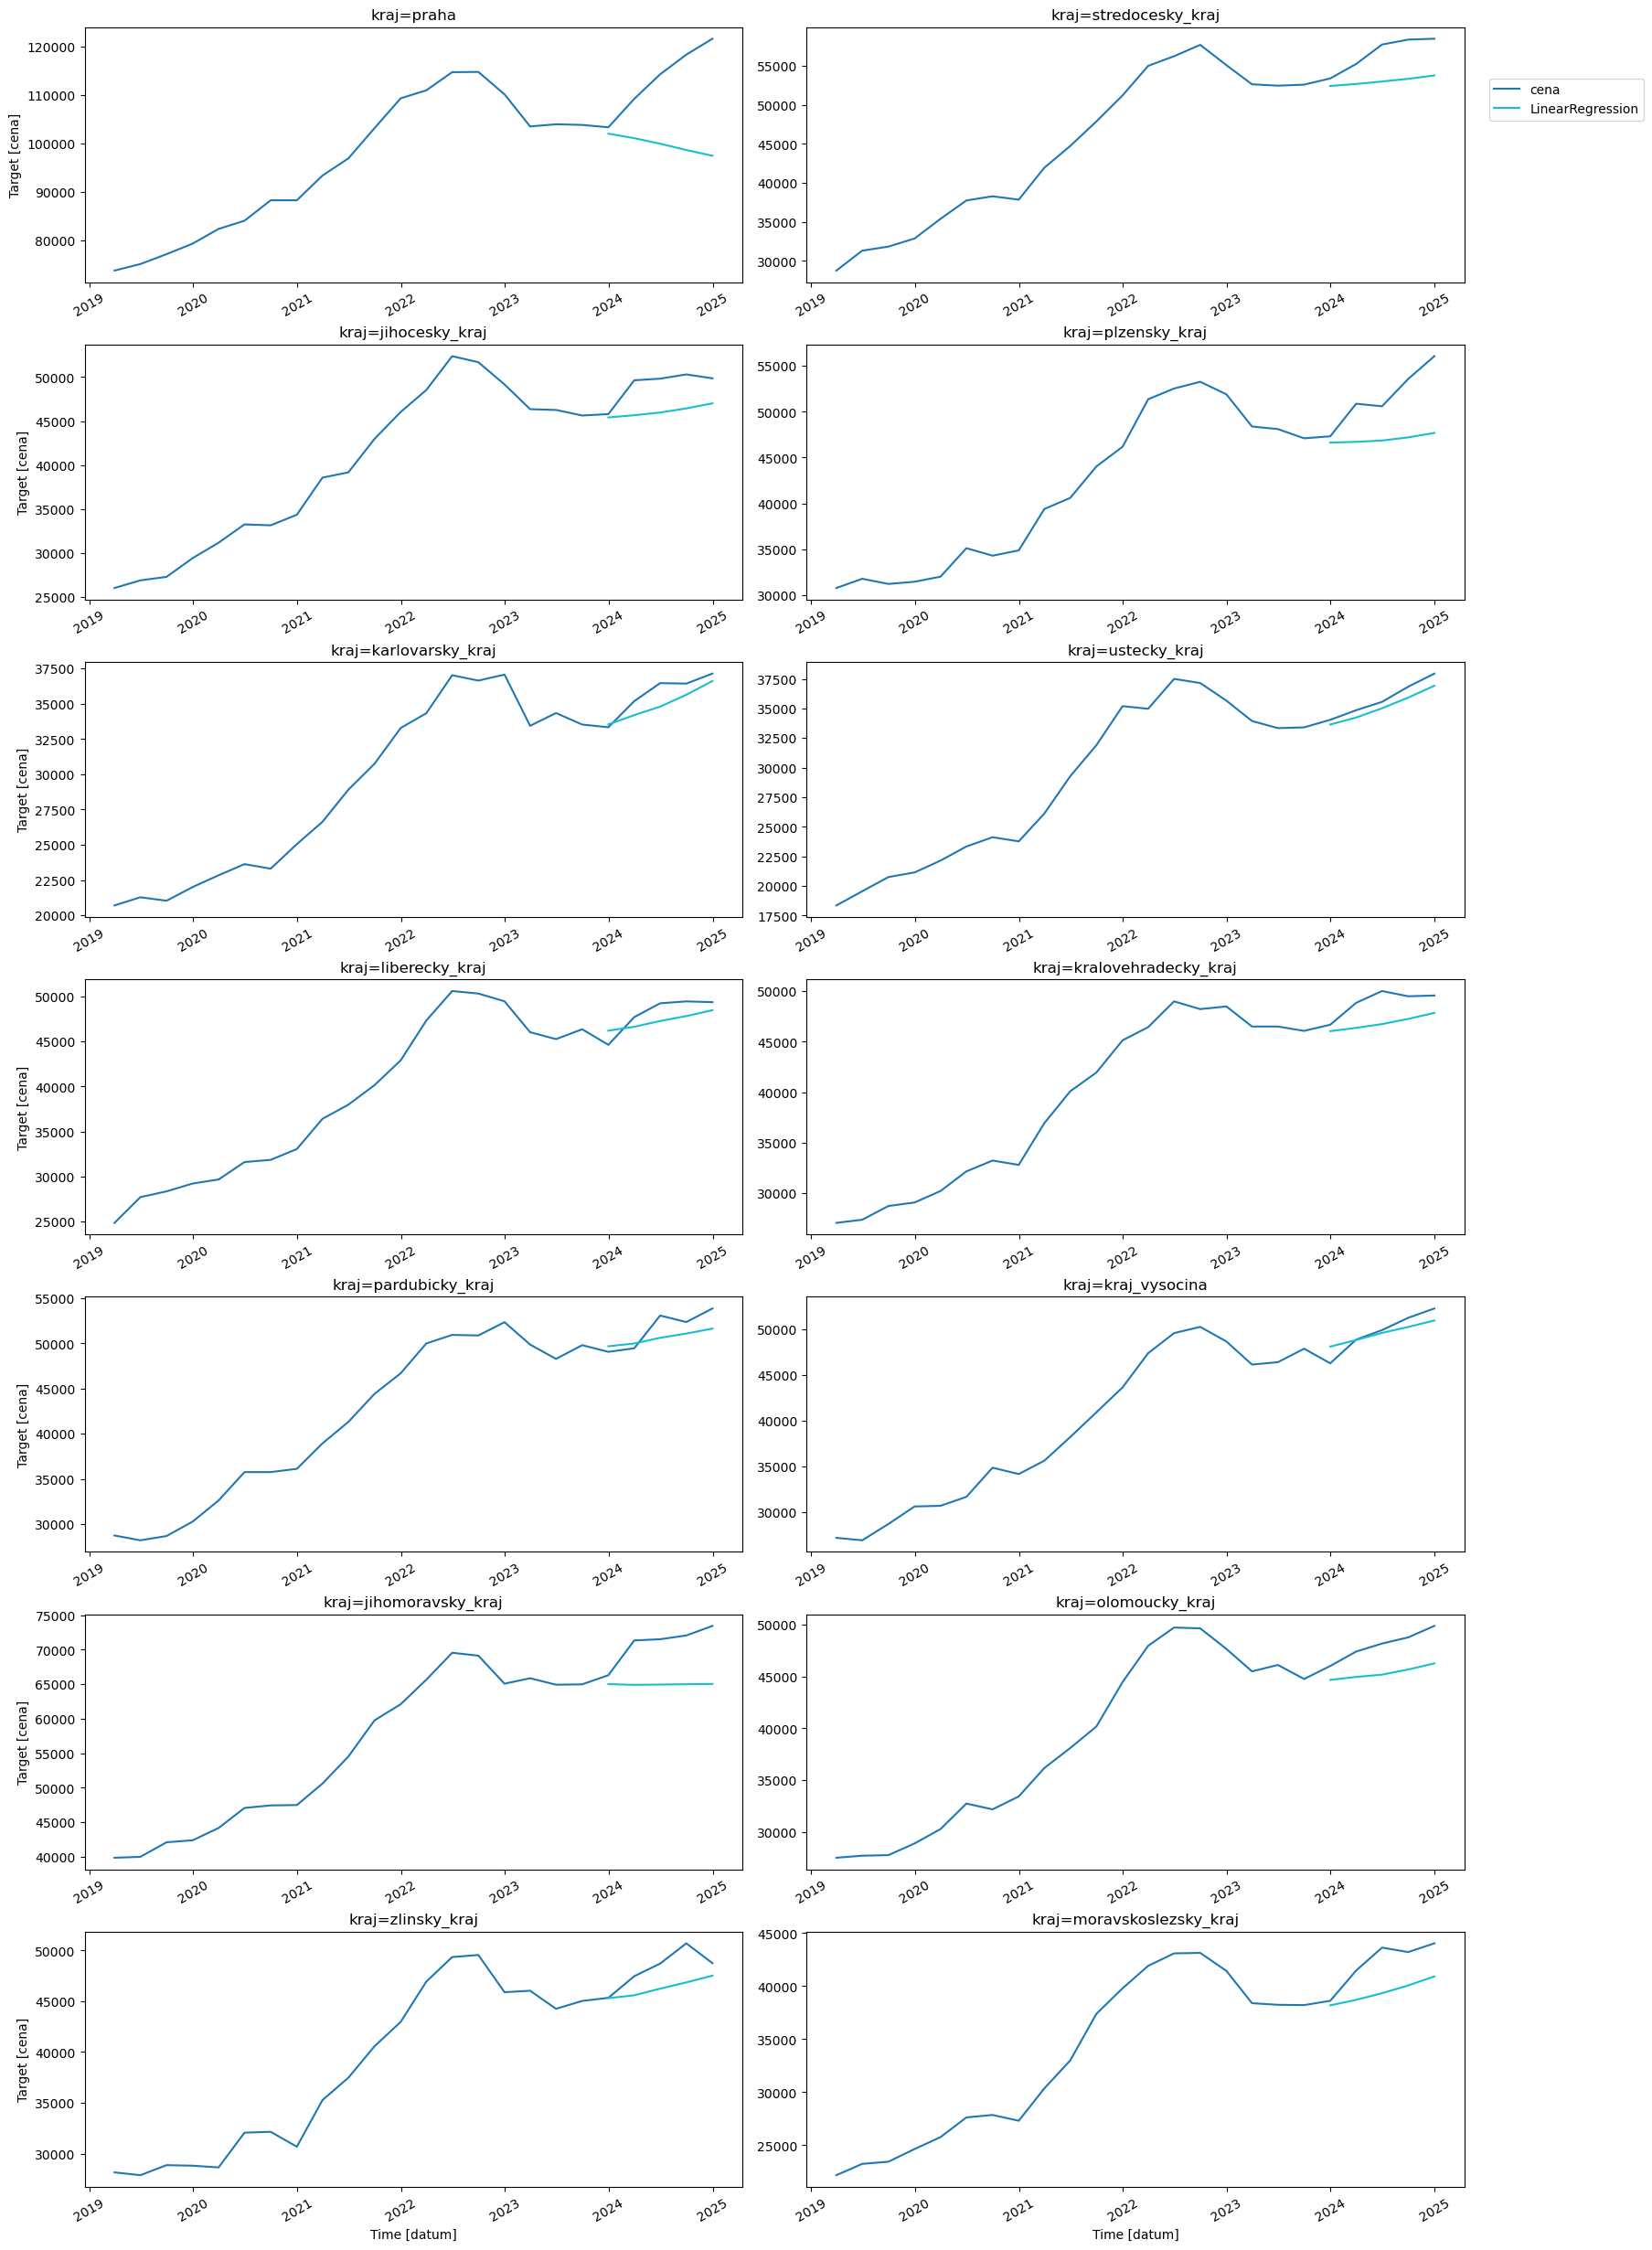

In [11]:
from utilsforecast.plotting import plot_series

plot_series(
    df = df,
    forecasts_df = cv_results.drop(columns=["cena", "cutoff"]),
    id_col = 'kraj',
    time_col = 'datum',
    target_col = 'cena',
    max_ids = 14
)